<a href="https://colab.research.google.com/github/satyamyeola/Optimal-Portfolio-Allocation/blob/main/Assignment3_25b2506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'TSLA']
df = yf.download(TICKERS, period="3y")
prices = df.xs("Close", axis=1, level=0)

prices = prices.fillna(method="ffill").dropna()
prices.head()

/tmp/ipython-input-3704320332.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKERS, period="3y")
[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-3704320332.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").dropna()


Ticker,AAPL,GOOGL,JPM,MSFT,TSLA
Date,,,,,
2023-01-03,123.211205,88.451698,125.492226,233.985657,108.099998
2023-01-04,124.482025,87.419487,126.662430,223.750397,113.639999
2023-01-05,123.161942,85.553581,126.634377,217.118912,110.339996
2023-01-06,127.693588,86.685036,129.057602,219.677734,113.059998
2023-01-09,128.215698,87.359924,128.524307,221.816589,119.769997


In [ ]:
log_returns = log_returns = np.log(prices / prices.shift(1))
log_returns.head()

Ticker,AAPL,GOOGL,JPM,MSFT,TSLA
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010261,-0.011738,0.009282,-0.044729,0.049979
2023-01-05,-0.010661,-0.021575,-0.000222,-0.030086,-0.029469
2023-01-06,0.036133,0.013138,0.018955,0.011716,0.024352
2023-01-09,0.004080,0.007755,-0.004141,0.009689,0.057655


In [ ]:
mu =  log_returns.mean() * 252
Sigma =  log_returns.cov() * 252

mu, Sigma

(Ticker
 AAPL     0.270181
 GOOGL    0.428041
 JPM      0.316399
 MSFT     0.238436
 TSLA     0.478578
 dtype: float64,
 Ticker      AAPL     GOOGL       JPM      MSFT      TSLA
 Ticker                                                  
 AAPL    0.064723  0.035307  0.017896  0.028512  0.066270
 GOOGL   0.035307  0.091269  0.017357  0.034273  0.069264
 JPM     0.017896  0.017357  0.053071  0.013307  0.047474
 MSFT    0.028512  0.034273  0.013307  0.053442  0.050131
 TSLA    0.066270  0.069264  0.047474  0.050131  0.354040)

In [ ]:
n = len(TICKERS)
w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)


In [ ]:
risk = cp.quad_form(w, Sigma)
ret = mu.values @ w
objective = cp.Minimize(gamma * risk - ret)

In [ ]:
constraints = [cp.sum(w) == 1, w >= 0]

prob = cp.Problem(objective, constraints)

In [ ]:
gamma_vals = np.logspace(-2, 3, 50)
frontier_risks = []
frontier_rets = []

for g in gamma_vals:
    gamma.value = g
    prob.solve()
    if prob.status == 'optimal':
        frontier_risks.append(np.sqrt(w.value.T @ Sigma @ w.value))
        frontier_rets.append(mu @ w.value)

In [ ]:
mvp_prob = cp.Problem(cp.Minimize(risk), [cp.sum(w) == 1, w >= 0])
mvp_prob.solve()
mvp_risk = np.sqrt(mvp_prob.value)
mvp_ret = mu @ w.value

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-127136976.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(frontier_risks, frontier_rets, 'g-', label='Efficient Frontier ($\lambda$ sweep)')


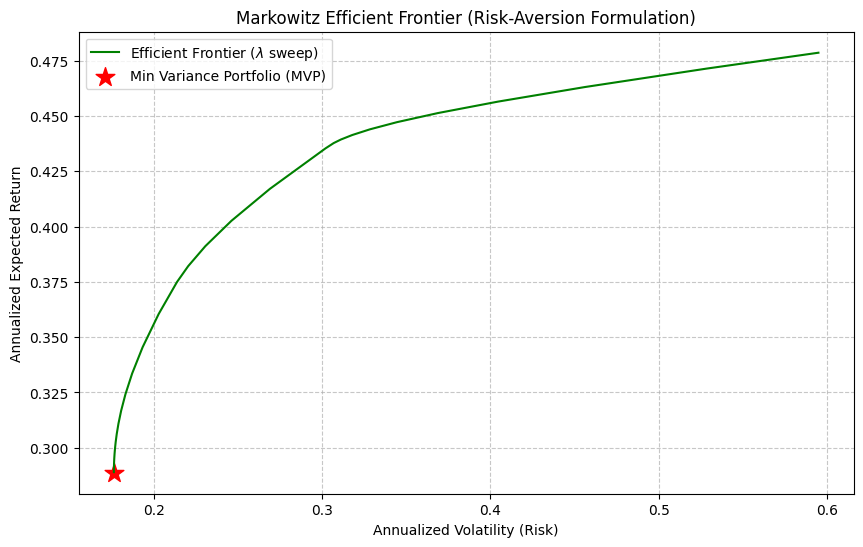

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(frontier_risks, frontier_rets, 'g-', label='Efficient Frontier ($\lambda$ sweep)')
plt.scatter(mvp_risk, mvp_ret, color='red', marker='*', s=200, label='Min Variance Portfolio (MVP)')

# Formatting the plot to look professional
plt.title('Markowitz Efficient Frontier (Risk-Aversion Formulation)')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Expected Return')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()